# 数据输入

## CSV读取

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpt
from scipy.fftpack import fft,ifft
import seaborn
import csv

## 直接读取

In [2]:
force_01 = pd.read_csv(r'D:\data\20190513\Force\20190513_01_new.csv')
force_02 = pd.read_csv(r'D:\data\20190513\Force\20190513_02_new.csv')
force_03 = pd.read_csv(r'D:\data\20190513\Force\20190513_03_new.csv')
force_04 = pd.read_csv(r'D:\data\20190513\Force\20190513_04_new.csv')

## 预去0处理（可忽略）

force_11 = force_01.query('Fx12!=0 and Fx34!=0 and Fy14!=0')
#force_12 = force_02.query('Fx12!=0 and Fx34!=0 and Fy14!=0')
#force_13 = force_03.query('Fx12!=0 and Fx34!=0 and Fy14!=0')
#force_14 = force_04.query('Fx12!=0 and Fx34!=0 and Fy14!=0')

## 拼接数据

In [3]:
force_all_0 = pd.concat([force_01, force_02, force_03, force_04],ignore_index = True)
#force_all = pd.concat([force_11, force_12, force_13, force_14],ignore_index = True)
print(force_all_0.shape)

(8700004, 10)


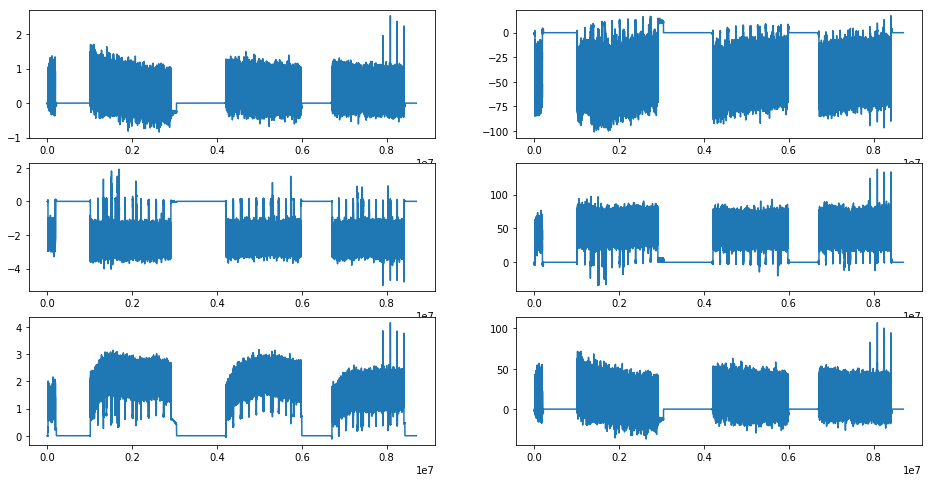

In [4]:
plt.figure(figsize=(16, 8))


plt.subplot(3,2,1)
plt.plot(force_all_0.Mx)
title = ('Mx')
plt.subplot(3,2,2)
plt.plot(force_all_0.Fx)
title = ('Fx')

plt.subplot(3,2,3)
plt.plot(force_all_0.My)
title = ('My')
plt.subplot(3,2,4)
plt.plot(force_all_0.Fy)
title = ('Fy')

plt.subplot(3,2,5)
plt.plot(force_all_0.Mz)
title = ('Mz')
plt.subplot(3,2,6)
plt.plot(force_all_0.Fz)
title = ('Fz')

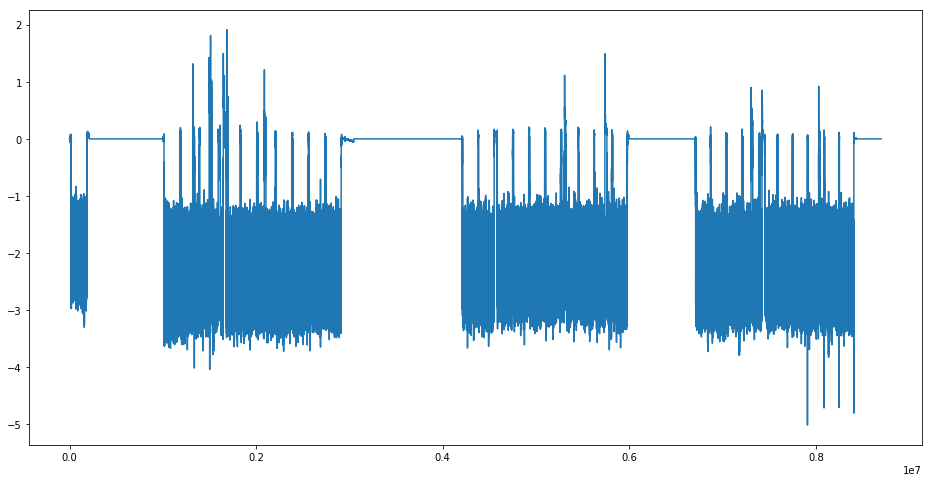

In [5]:
plt.figure(figsize=(16, 8))
plt.plot(force_all_0.My)
plt.title = ('My')

# 数据预处理

## 去除无效值（末端0数据）

(8700004,)
(5778578,)


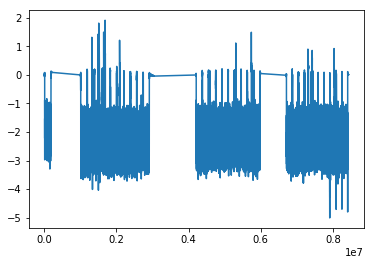

In [6]:
force_all_1 = force_all_0.query('Fx12!=0 and Fx34!=0 and Fy14!=0')
print(force_all_0.My.shape)
print(force_all_1.My.shape)
#plt.figure(figsize=(16, 8))
plt.plot(force_all_1.My)

## 去除尖峰

(5778578,)
(5693890,)


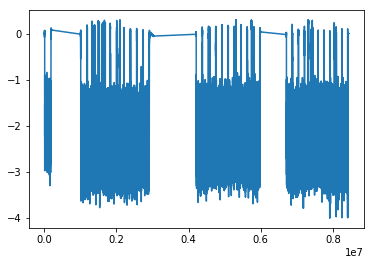

In [7]:
big = 0.3
small= -4.0
force_all_2 = force_all_1.query('My <= {} and My >= {}'.format(big, small))
print(force_all_1.My.shape)
print(force_all_2.My.shape)
#plt.figure(figsize=(16, 8))
plt.plot(force_all_2.My)

(10000,) (10000,) (10000,) (10000,)


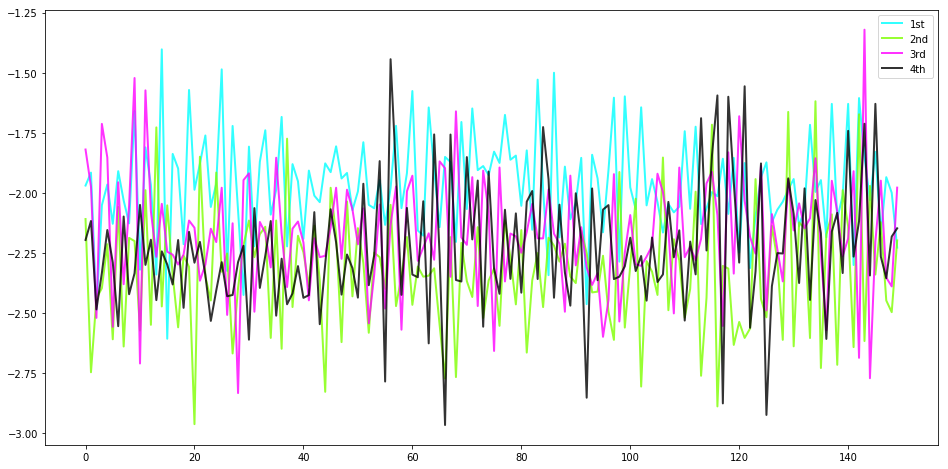

In [8]:
n = 150
nnn = np.arange(len(force_all_2.My))

plt.figure(figsize=(16,8))
AA=force_all_2.My[20000:30000]
BB=force_all_2.My[1010000:1020000]
CC=force_all_2.My[2700000:2710000]
DD=force_all_2.My[5000000:5010000]

plt.plot(nnn[:n], AA[:n],lw=2, alpha = 0.8, color = 'cyan',  label='AAA')#蓝色
plt.plot(nnn[:n], BB[:n], lw=2,alpha = 0.8, color = 'chartreuse', label = 'BBB')#绿色
plt.plot(nnn[:n], CC[:n],lw=2, alpha = 0.8, color = 'magenta', label = 'CCC')#紫色
plt.plot(nnn[:n], DD[:n],lw=2, alpha = 0.8, color = 'black', label = 'DDD')#黑色
plt.legend( ['1st', '2nd', '3rd', '4th'])

print(AA.shape, BB.shape, CC.shape, DD.shape)

# Scipy

In [9]:
import signal
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from scipy import *

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd
import scipy.signal

from scipy import stats

### 中值滤波

plt.figure(figsize=(16, 8))
n=len(AA)
t=np.arange(n)
M_a= scipy.signal.medfilt(AA,(15)) #二维中值滤波
M_b= scipy.signal.medfilt(BB,(15)) #二维中值滤波
M_c= scipy.signal.medfilt(CC,(15)) #二维中值滤波
M_d= scipy.signal.medfilt(DD,(15)) #二维中值滤波

### 平滑滤波 smoothed

M = 15
window = np.ones(M)
window /= sum(window)
S_a = np.convolve(AA, window, mode='same')#same, valid
S_b = np.convolve(BB, window, mode='same')#same, valid
S_c = np.convolve(CC, window, mode='same')#same, valid
S_d = np.convolve(DD, window, mode='same')#same, valid
#smoothed_days = days[M//2: len(smoothed) + M//2]
thinkplot.plot(window)

n=len(AA)
t=np.arange(n)
#smoothed_days = t[M//2: len(smoothed) + M//2]
thinkplot.plot(t, BB, label='30 day average')
thinkplot.plot(t, S_b, color = 'r',label='30 day average')

### 高斯滤波 gaussianed

构建高斯函数

gaussian = scipy.signal.gaussian(M=15, std=2)
gaussian /= sum(gaussian)

#gaussianed = np.convolve(AA, gaussian, mode='valid')
G_a = np.convolve(AA, gaussian, mode='same')
G_b = np.convolve(BB, gaussian, mode='same')
G_c = np.convolve(CC, gaussian, mode='same')
G_d = np.convolve(DD, gaussian, mode='same')
#smoothed_days = days[M//2: len(smoothed) + M//2]

thinkplot.preplot(2)
thinkplot.plot(window, label='Smooth')
thinkplot.plot(gaussian, label='Gaussian')
thinkplot.config(xlabel='Index',
                 loc='upper right')

### 对比结果

n=100
t=np.arange(n)
plt.figure(figsize=(16, 8))
plt.plot(t,AA[:n], lw=3, color = 'limegreen',label='new', alpha = 0.5)
plt.plot(t,M_a[:n], lw=3, color = 'navy', label='old', alpha = 0.8)
plt.plot(t,S_a[:n],lw=3, color = 'deepskyblue', label='old', alpha = 0.8)
plt.plot(t,G_a[:n],lw=3, color = 'red', label='old',alpha = 0.8)
plt.legend( ['orignal', 'average_15', 'Smoothed_15' ,'Gaussian_15'])

n=300
t=np.arange(n)
plt.figure(figsize=(16, 8))
plt.plot(t, AA[:n],  lw=1, color = 'limegreen',label='new', alpha = 0.5)
plt.plot(t, M_a[:n], lw=1, color = 'navy', label='old', alpha = 0.8)
plt.plot(t, S_a[:n], lw=1, color = 'deepskyblue', label='old', alpha = 0.8)
plt.plot(t, G_a[:n], lw=1, color = 'red', label='old',alpha = 0.8)
plt.legend( ['orignal', 'average_15', 'Smoothed_15' ,'Gaussian_15'])

plt.figure(figsize=(16, 8))
n=len(AA)
t=np.arange(n)

plt.subplot(221)
plt.plot(t, AA[:n],  lw=1, color = 'limegreen',label='new', alpha = 0.5)
plt.plot(t, M_a[:n], lw=1, color = 'navy', label='old', alpha = 0.8)
plt.plot(t, S_a[:n], lw=1, color = 'deepskyblue', label='old', alpha = 0.8)
plt.plot(t, G_a[:n], lw=1, color = 'red', label='old',alpha = 0.8)
plt.legend( ['orignal', 'average_15', 'Smoothed_15' ,'Gaussian_15'])

plt.subplot(222)
plt.plot(t, BB[:n],  lw=1, color = 'limegreen',label='new', alpha = 0.5)
plt.plot(t, M_b[:n], lw=1, color = 'navy', label='old', alpha = 0.8)
plt.plot(t, S_b[:n], lw=1, color = 'deepskyblue', label='old', alpha = 0.8)
plt.plot(t, G_b[:n], lw=1, color = 'red', label='old',alpha = 0.8)
plt.legend( ['orignal', 'average_15', 'Smoothed_15' ,'Gaussian_15'])

plt.subplot(223)
plt.plot(t, CC[:n],  lw=1, color = 'limegreen',label='new', alpha = 0.5)
plt.plot(t, M_c[:n], lw=1, color = 'navy', label='old', alpha = 0.8)
plt.plot(t, S_c[:n], lw=1, color = 'deepskyblue', label='old', alpha = 0.8)
plt.plot(t, G_c[:n], lw=1, color = 'red', label='old',alpha = 0.8)
plt.legend( ['orignal', 'average_15', 'Smoothed_15' ,'Gaussian_15'])

plt.subplot(224)
plt.plot(t, DD[:n],  lw=1, color = 'limegreen',label='new', alpha = 0.5)
plt.plot(t, M_d[:n], lw=1, color = 'navy', label='old', alpha = 0.8)
plt.plot(t, S_d[:n], lw=1, color = 'deepskyblue', label='old', alpha = 0.8)
plt.plot(t, G_d[:n], lw=1, color = 'red', label='old',alpha = 0.8)
plt.legend( ['orignal', 'average_15', 'Smoothed_15' ,'Gaussian_15'])

plt.figure(figsize=(16, 8))
n=300
t=np.arange(n)

plt.subplot(221)
plt.plot(t, AA[:n],  lw=1, color = 'limegreen',label='new', alpha = 0.5)
plt.plot(t, M_a[:n], lw=1, color = 'navy', label='old', alpha = 0.8)
plt.plot(t, S_a[:n], lw=1, color = 'deepskyblue', label='old', alpha = 0.8)
plt.plot(t, G_a[:n], lw=1, color = 'red', label='old',alpha = 0.8)
plt.legend( ['orignal', 'average_15', 'Smoothed_15' ,'Gaussian_15'])

plt.subplot(222)
plt.plot(t, BB[:n],  lw=1, color = 'limegreen',label='new', alpha = 0.5)
plt.plot(t, M_b[:n], lw=1, color = 'navy', label='old', alpha = 0.8)
plt.plot(t, S_b[:n], lw=1, color = 'deepskyblue', label='old', alpha = 0.8)
plt.plot(t, G_b[:n], lw=1, color = 'red', label='old',alpha = 0.8)
plt.legend( ['orignal', 'average_15', 'Smoothed_15' ,'Gaussian_15'])

plt.subplot(223)
plt.plot(t, CC[:n],  lw=1, color = 'limegreen',label='new', alpha = 0.5)
plt.plot(t, M_c[:n], lw=1, color = 'navy', label='old', alpha = 0.8)
plt.plot(t, S_c[:n], lw=1, color = 'deepskyblue', label='old', alpha = 0.8)
plt.plot(t, G_c[:n], lw=1, color = 'red', label='old',alpha = 0.8)
plt.legend( ['orignal', 'average_15', 'Smoothed_15' ,'Gaussian_15'])

plt.subplot(224)
plt.plot(t, DD[:n],  lw=1, color = 'limegreen',label='new', alpha = 0.5)
plt.plot(t, M_d[:n], lw=1, color = 'navy', label='old', alpha = 0.8)
plt.plot(t, S_d[:n], lw=1, color = 'deepskyblue', label='old', alpha = 0.8)
plt.plot(t, G_d[:n], lw=1, color = 'red', label='old',alpha = 0.8)
plt.legend( ['orignal', 'average_15', 'Smoothed_15' ,'Gaussian_15'])

### 封装滤波DoFilter()

In [13]:
class DoFilter():
    def __init__(self, data, number = 15, biaozhuncha = 2):
        self.data = data
        self.number = number
        self.biaozhuncha = biaozhuncha
        
        #二维中值滤波
        self.middled = scipy.signal.medfilt(self.data, (self.number)) 
                
        #平滑滤波
        window = np.ones(self.number)
        window /= sum(window)
        self.smoothed = np.convolve(self.data, window, mode='same')#same, valid
        
        #高斯滤波
        gaussian = scipy.signal.gaussian(M = self.number, std = self.biaozhuncha)
        gaussian /= sum(gaussian)
        self.gaussianed = np.convolve(self.data, gaussian, mode='same')
        
    def middled(self):
        return self.middled
    
    def smoothed(self):
        return self.smoothed
    
    def gaussianed(self):
        return self.gaussianed

    def time_domain_show(self):
        print('原始数据的平均数={}，原始数据的标准差={}'.format(stats.norm.fit(self.data)[0], stats.norm.fit(self.data)[1]))
        print('中值滤波的平均数={}，中值滤波的标准差={}'.format(stats.norm.fit(self.middled)[0], stats.norm.fit(self.middled)[1]))
        print('平滑滤波的平均数={}，平滑滤波的标准差={}'.format(stats.norm.fit(self.smoothed)[0], stats.norm.fit(self.smoothed)[1]))
        print('高斯滤波的平均数={}，高斯滤波的标准差={}\n'.format(stats.norm.fit(self.gaussianed)[0], stats.norm.fit(self.gaussianed)[1]))
        
        print('原始数据的偏度={}，P值={}'.format(stats.skewtest(self.data)[0], stats.skewtest(self.data)[1]))
        print('中值滤波的偏度={}，P值={}'.format(stats.skewtest(self.middled)[0], stats.skewtest(self.middled)[1]))
        print('平滑滤波的偏度={}，P值={}'.format(stats.skewtest(self.smoothed)[0], stats.skewtest(self.smoothed)[1]))
        print('高斯滤波的偏度={}，P值={}\n'.format(stats.skewtest(self.gaussianed)[0], stats.skewtest(self.gaussianed)[1]))
        
        print('原始数据的峰度={}，P值={}'.format(stats.kurtosistest(self.data)[0], stats.kurtosistest(self.data)[1]))
        print('中值滤波的峰度={}，P值={}'.format(stats.kurtosistest(self.middled)[0], stats.kurtosistest(self.middled)[1]))
        print('平滑滤波的峰度={}，P值={}'.format(stats.kurtosistest(self.smoothed)[0], stats.kurtosistest(self.smoothed)[1]))
        print('高斯滤波的峰度={}，P值={}\n'.format(stats.kurtosistest(self.gaussianed)[0], stats.kurtosistest(self.gaussianed)[1]))
        
        print('原始数据的正态性={}，P值={}'.format(stats.normaltest(self.data)[0], stats.normaltest(self.data)[1]))
        print('中值滤波的正态性={}，P值={}'.format(stats.normaltest(self.middled)[0], stats.normaltest(self.middled)[1]))
        print('平滑滤波的正态性={}，P值={}'.format(stats.normaltest(self.smoothed)[0], stats.normaltest(self.smoothed)[1]))
        print('高斯滤波的正态性={}，P值={}\n'.format(stats.normaltest(self.gaussianed)[0], stats.normaltest(self.gaussianed)[1]))
        
        print('原始数据的Jarque-Bera正态性={}, P值={}'.format(stats.jarque_bera(self.data)[0], stats.jarque_bera(self.data)[1]))
        print('中值滤波的Jarque-Bera正态性={}，P值={}'.format(stats.jarque_bera(self.middled)[0], stats.jarque_bera(self.middled)[1]))
        print('平滑滤波的Jarque-Bera正态性={}，P值={}'.format(stats.jarque_bera(self.smoothed)[0], stats.jarque_bera(self.smoothed)[1]))
        print('高斯滤波的Jarque-Bera正态性={}，P值={}\n'.format(stats.jarque_bera(self.gaussianed)[0], stats.jarque_bera(self.gaussianed)[1]))
        
        
        
    def time_domain_calculate(self):
        a_1 = stats.norm.fit(self.data)[0]-stats.norm.fit(self.middled)[0]
        a_2 = stats.norm.fit(self.data)[0]-stats.norm.fit(self.gaussianed)[0]
        a_3 = stats.norm.fit(self.data)[0]-stats.norm.fit(self.smoothed)[0]
        
        a_4 = stats.norm.fit(self.data)[1]-stats.norm.fit(self.middled)[1]
        a_5 = stats.norm.fit(self.data)[1]-stats.norm.fit(self.gaussianed)[1]
        a_6 = stats.norm.fit(self.data)[1]-stats.norm.fit(self.smoothed)[1]
        
        print('中值滤波平均数差距={}\n平滑滤波平均数差距={}\n高斯滤波平均数差距={}\n'.format(a_1, a_2, a_3))
        print('中值滤波标准差差距={}\n平滑滤波标准差差距={}\n高斯滤波标准差差距={}\n\n'.format(a_4, a_5, a_6))
        
        b_1 = stats.skewtest(self.data)[0]-stats.skewtest(self.middled)[0]
        b_2 = stats.skewtest(self.data)[0]-stats.skewtest(self.gaussianed)[0]
        b_3 = stats.skewtest(self.data)[0]-stats.skewtest(self.smoothed)[0]
        
        print('中值滤波差距={}\n平滑滤波差距={}\n高斯滤波差距={}\n\n'.format(b_1, b_2, b_3))
        
        c_1 = stats.kurtosistest(self.data)[0]-stats.kurtosistest(self.middled)[0]
        c_2 = stats.kurtosistest(self.data)[0]-stats.kurtosistest(self.gaussianed)[0]
        c_3 = stats.kurtosistest(self.data)[0]-stats.kurtosistest(self.smoothed)[0]
        
        print('中值滤波差距={}\n平滑滤波差距={}\n高斯滤波差距={}\n\n'.format(c_1, c_2, c_3))
        
        d_1 = stats.normaltest(self.data)[0]-stats.normaltest(self.middled)[0]
        d_2 = stats.normaltest(self.data)[0]-stats.normaltest(self.gaussianed)[0]
        d_3 = stats.normaltest(self.data)[0]-stats.normaltest(self.smoothed)[0]
        
        print('中值滤波差距={}\n平滑滤波差距={}\n高斯滤波差距={}\n\n'.format(d_1, d_2, d_3))
        
        e_1 = stats.jarque_bera(self.data)[0]-stats.jarque_bera(self.middled)[0]
        e_2 = stats.jarque_bera(self.data)[0]-stats.jarque_bera(self.gaussianed)[0]
        e_3 = stats.jarque_bera(self.data)[0]-stats.jarque_bera(self.smoothed)[0]
        
        print('中值滤波差距={}\n平滑滤波差距={}\n高斯滤波差距={}'.format(e_1, e_2, e_3))

### 观察数据

a = Observe(AA)
a.show_data()

In [14]:
e = Observe(force_all_2.My)

In [19]:
a = Observe(AA)
b = Observe(BB)
c = Observe(CC)
d = Observe(DD)

In [21]:
c.time_domain_show()

原始数据的平均数=-2.2062291179999995，原始数据的标准差=0.270748051320969
中值滤波的平均数=-2.204936395，中值滤波的标准差=0.06927526689197216
平滑滤波的平均数=-2.2054666845333335，平滑滤波的标准差=0.05480040371399093
高斯滤波的平均数=-2.2059193499877967，高斯滤波的标准差=0.06451560565423964

原始数据的偏度=-1.6035492111429948，P值=0.10881345350826718
中值滤波的偏度=3.361512973472758，P值=0.0007751671502531955
平滑滤波的偏度=73.68895870151482，P值=0.0
高斯滤波的偏度=29.402839097188686，P值=5.051363541452515e-190

原始数据的峰度=2.4760801904227163，P值=0.013283373937601742
中值滤波的峰度=8.705857703538863，P值=3.1518207462219255e-18
平滑滤波的峰度=59.28769324131332，P值=0.0
高斯滤波的峰度=44.43851015017369，P值=0.0

原始数据的正态性=8.702343181961115，P值=0.01289169992992404
中值滤波的正态性=87.09172782509262，P值=1.225382272304592e-19
平滑滤波的正态性=8945.093204389626，P值=0.0
高斯滤波的正态性=2839.3081313422576，P值=0.0

原始数据的Jarque-Bera正态性=9.274949915895764, P值=0.00968211453405865
中值滤波的Jarque-Bera正态性=129.60545356918072，P值=0.0
平滑滤波的Jarque-Bera正态性=1604991.913597209，P值=0.0
高斯滤波的Jarque-Bera正态性=66907.7793604663，P值=0.0



In [16]:
e.time_domain_calculate()

中值滤波平均数差距=-0.00024209617958748098
平滑滤波平均数差距=1.5111760731656432e-09
高斯滤波平均数差距=3.821843286289095e-09

中值滤波标准差差距=0.041143030400029534
平滑滤波标准差差距=0.04164368960210996
高斯滤波标准差差距=0.04272524365714414


中值滤波差距=-162.89952494229465
平滑滤波差距=-165.12162062547145
高斯滤波差距=-169.42987777534904


中值滤波差距=-115.90687435129564
平滑滤波差距=-117.41253636076249
高斯滤波差距=-120.36528921542651


中值滤波差距=-590974.5423244694
平滑滤波差距=-599480.2911367645
高斯滤波差距=-616060.8877779655


中值滤波差距=-3886604.0660974365
平滑滤波差距=-3955038.429355191
高斯滤波差距=-4090090.723910123


In [26]:
import thinkdsp
import thinkplot
import thinkstats2

import numpy as np

import warnings
warnings.filterwarnings('ignore')

PI2 = 2 * np.pi

np.set_printoptions(precision=3, suppress=True)

In [33]:
aa = a.gaussianed

In [34]:
aa.shape

(10000,)

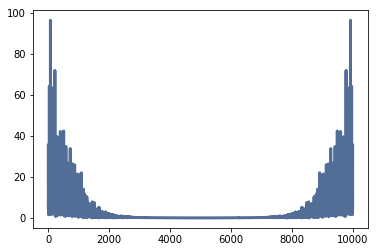

In [32]:
aa_dft = np.fft.fft(aa)
thinkplot.plot(abs(aa_dft[1:]))

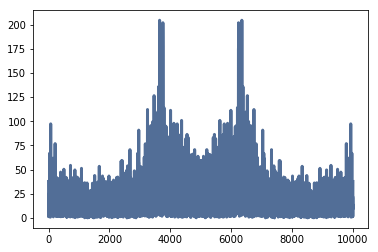

In [36]:
AA_dft = np.fft.fft(AA)
thinkplot.plot(abs(AA_dft[1:]))

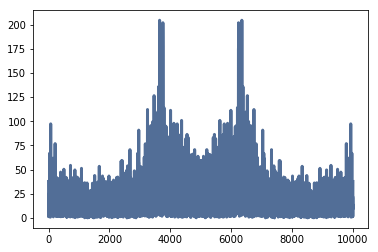

In [38]:
AA_1 = fft(AA)
thinkplot.plot(abs(AA_1[1:]))

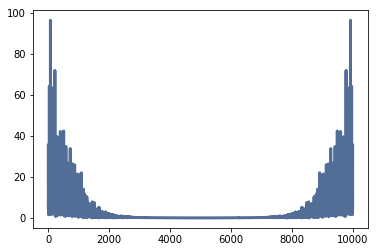

In [41]:
aa_1 = fft(aa)
thinkplot.plot(abs(aa_1[1:]))

## 封装频域DoFrequence()

In [43]:
class DoFrequence():
    def __init__(self, data):
        self.data = data
        length = len(data)
        self.discrete_fourier_transform = dft(self.data)
        self.fast_fourier_transform = fft(self.data)
        
    def show_dft(self):
        thinkplot.plot(abs(self.discrete_fourier_transform[1:]))
        
    def show_fft(self):
        thinkplot.plot(abs(self.fast_fourier_transform[1:]))       

In [ ]:
a.gaussianed

# 抽样

In [54]:
e.gaussianed.shape

(5693890,)

In [93]:
x_len = len(e.gaussianed)
x_len_1 = x_len // 1000
chouyang = arange(x_len_1)
chouyang *= 1000
chouyang

array([      0,    1000,    2000, ..., 5690000, 5691000, 5692000])

In [94]:
force_all_3_My = e.gaussianed.take(chouyang)
force_all_3_My.shape

(5693,)

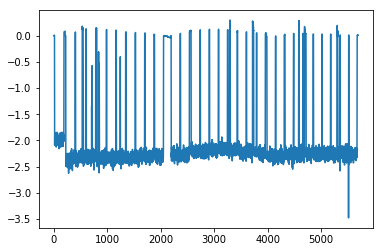

In [95]:
#big = -1
#small= -3.0
#force_all_4_My = pd.DataFrame(force_all_3_My)
#force_all_5_My = force_all_4_My.query('My <= {} and My >= {}'.format(big, small))
plt.plot(force_all_3_My)
#plt.plot(force_all_2.My, alpha = 0.5)

In [72]:
new = Observe(force_all_3_My)
#new.show_data()
e.show_data()

原始数据的平均数=-2.003453339843981，原始数据的标准差=0.7649385152494905
中值滤波平均数差距=-0.00024209617958748098
平滑滤波平均数差距=1.5111760731656432e-09
高斯滤波平均数差距=3.821843286289095e-09

中值滤波标准差差距=0.041143030400029534
平滑滤波标准差差距=0.04164368960210996
高斯滤波标准差差距=0.04272524365714414

原始数据的偏度=1263.6685329253241，P值=0.0
中值滤波差距=-162.89952494229465
平滑滤波差距=-165.12162062547145
高斯滤波差距=-169.42987777534904

原始数据的峰度=600.9215456791251，P值=0.0
中值滤波差距=-115.90687435129564
平滑滤波差距=-117.41253636076249
高斯滤波差距=-120.36528921542651

原始数据的正态性=1957964.8651670297，P值=0.0
中值滤波差距=-590974.5423244694
平滑滤波差距=-599480.2911367645
高斯滤波差距=-616060.8877779655

原始数据的Jarque-Bera正态性检验=5210637.756938193,  P值=0.0
中值滤波差距=-3886604.0660974365
平滑滤波差距=-3955038.429355191
高斯滤波差距=-4090090.723910123



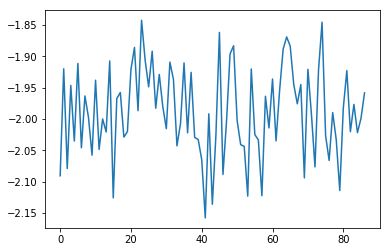

In [88]:
plt.plot(force_all_3_My[8:95])

In [ ]:
print('95%处的数据值是：',stats.scoreatpercentile(AAA, 95))

In [ ]:
print('从数值1出发找到对应的百分比：',stats.percentileofscore(AAA, -0.05))

In [ ]:
plt.hist(AA, color='cyan',  label = 'AAA',alpha=0.6)
plt.hist(a3,color='red',   label = 'BBB',alpha=0.6)
plt.hist(a5, color='black' , label = 'BBB',alpha=0.6)
plt.legend()
plt.show()

In [148]:
stats.jarque_bera(G_b)[0] - stats.jarque_bera(G_b)[1]

30876.2867327152

In [ ]:
print('均值检查  P值（概率）',format(stats.ttest_ind(AAA, BBB)))

In [ ]:
print('两组样本同分布的可能性  P值（概率）',format(stats.ks_2samp(AAA, BBB)))

In [12]:
e = Observe(force_all_2.My)

原始数据的平均数=-2.003453339843981，原始数据的标准差=0.7649385152494905
中值滤波平均数差距=-0.00024209617958748098
平滑滤波平均数差距=1.5111760731656432e-09
高斯滤波平均数差距=3.821843286289095e-09

中值滤波标准差差距=0.041143030400029534
平滑滤波标准差差距=0.04164368960210996
高斯滤波标准差差距=0.04272524365714414

原始数据的偏度=1263.6685329253241，P值=0.0
中值滤波差距=-162.89952494229465
平滑滤波差距=-165.12162062547145
高斯滤波差距=-169.42987777534904

原始数据的峰度=600.9215456791251，P值=0.0
中值滤波差距=-115.90687435129564
平滑滤波差距=-117.41253636076249
高斯滤波差距=-120.36528921542651

原始数据的正态性=1957964.8651670297，P值=0.0
中值滤波差距=-590974.5423244694
平滑滤波差距=-599480.2911367645
高斯滤波差距=-616060.8877779655

原始数据的Jarque-Bera正态性检验=5210637.756938193,  P值=0.0
中值滤波差距=-3886604.0660974365
平滑滤波差距=-3955038.429355191
高斯滤波差距=-4090090.723910123



In [ ]:
stats.jarque_bera(b3)

In [ ]:
stats.jarque_bera(DD)[2]

In [ ]:
b, a = scipy.signal.butter(1, 0.02, btype='low', analog=False, output='ba')
filtedData = signal.filt(b, a, AAA)

In [ ]:
convolved = np.convolve(AA, gaussian, mode='same')
smooth = thinkdsp.Wave(convolved, framerate=wave.framerate)

ys = np.convolve(AA, gaussian, mode='same')
smooth = thinkdsp.Wave(ys, framerate=wave.framerate)
spectrum2 = smooth.make_spectrum()

# 高斯核平滑

## 手册代码

In [ ]:
gaussian = scipy.signal.gaussian(M=11, std=2)
gaussian /= sum(gaussian)

In [ ]:
thinkplot.preplot(2)
thinkplot.plot(xxx[:11], label='boxcar')
thinkplot.plot(gaussian[:11], label='Gaussian', color = 'r')
thinkplot.config(xlabel='Index',
                 loc='upper right')

In [ ]:
>>> window = signal.gaussian(11, std=7)
>>> plt.plot(window)
>>> plt.title(r"Gaussian window ($\sigma$=7)")
>>> plt.ylabel("Amplitude")
>>> plt.xlabel("Sample")

In [ ]:
>>> plt.figure()
>>> A = fft(window, 2048) / (len(window)/2.0)
>>> freq = np.linspace(-0.5, 0.5, len(A))
>>> response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
>>> plt.plot(freq, response)
>>> plt.axis([-0.5, 0.5, -120, 0])
>>> plt.title(r"Frequency response of the Gaussian window ($\sigma$=7)")
>>> plt.ylabel("Normalized magnitude [dB]")
>>> plt.xlabel("Normalized frequency [cycles per sample]")

In [ ]:


y=[ 191.78 ,   191.59,    191.59,    191.41,    191.47,    191.33,    191.25  ,191.33 ,   191.48 ,   191.48,    191.51,    191.43,    191.42,    191.54  
  ,191.5975,  191.555,   191.52 ,   191.25 ,   191.15  ,  191.01  ]
x = np.linspace(1 ,20,len(y))

# convert both to arrays
x_sm = np.array(x)
y_sm = np.array(y)

In [ ]:
# resample to lots more points - needed for the smoothed curves
x_smooth = np.linspace(x_sm.min(), x_sm.max(), 200)

# spline - always goes through all the data points x/y
y_spline = scipy.interpolate.BSpline(x, y, x_smooth)

In [ ]:
t, c, k = splrep(x, y, s=0)
spl = BSpline(t, c, k)
np.allclose(spl(x), y)

In [ ]:
spl = interpolate.UnivariateSpline(x, y)

sigma = 2
x_g1d = ndimage.gaussian_filter1d(x_sm, sigma)
y_g1d = ndimage.gaussian_filter1d(y_sm, sigma)

fig, ax = plt.subplots(figsize=(10, 10))
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)

plt.plot(x_sm, y_sm, 'green', linewidth=1)
plt.plot(x_smooth, y_spline, 'red', linewidth=1)
plt.plot(x_smooth, spl(x_smooth), 'yellow', linewidth=1)
plt.plot(x_g1d,y_g1d, 'magenta', linewidth=1)

plt.show()

In [ ]:


X, Y = mgrid[-70:70, -70:70]
Z = cos((X**2+Y**2)/200.)+ random.normal(size=X.shape)

In [ ]:
blur_image(Z, 3)

# 高斯

In [ ]:
gaussian = scipy.signal.gaussian(M=11, std=2)
gaussian /= sum(gaussian)

In [ ]:
in_data = force_all_0.My[:501]
plt.plot(in_data)

In [ ]:
xxx= np.array(in_data)

In [ ]:
xxx /= sum(xxx)

In [ ]:
plt.plot(xxx)

### 生成包含正态分布的随机数

In [ ]:

generated = stats.norm.rvs(size=900)

In [ ]:
plt.plot(generated)

In [ ]:
print('平均数{}，标准差{}'.format(stats.norm.fit(generated)[0], stats.norm.fit(generated)[1]))

In [ ]:
Print('偏度={}，服从正态分布的概率={}'.format(stats.skewtest()))